In [116]:
#See if there is any correlation betwween stuff candidates said in the debates and google trends data

import pandas as pd
import numpy as np
import string

from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 1000

In [108]:
common_words = pd.read_csv("../data/oecrank.csv")["Word"]
other_words = pd.Series(["it's","i","it’s"])

common_words = common_words.append(other_words)


def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    try:
        result = len(intersection)/len(union)
    except ZeroDivisionError:
        result = 0
    return result

#remove punctuations and all lowercase
def clean(value):
    puncs = string.punctuation
    while True:
        old_val = value
        for i in puncs:
            value = value.replace(i,'')
        if value == old_val:
            break
    value = value.lower()
    return ' '.join(value.split())

#removes common words, randomizes order
def remove_common(value):
    value = set(value.split()) - set(common_words)
    return ' '.join(list(value))

def typing(value):
    return type(value)

In [152]:
debates = pd.read_csv("../data/transcripts_cleaned.csv")

events = debates["month"].unique()

debates = debates[debates["name"].apply(lambda x: x in ["Sanders","Warren","Biden","Klobuchar","Buttigieg"])]
debates["text"] = debates["text"].apply(clean)
debates["text"] = debates["text"].apply(remove_common)

debates.index=range(len(debates))

,name,text,month,time
0,Warren,thank here,june,NaN
1,Warren,thinner working doing giant apart prescription...,june,NaN
2,Warren,you’ve doing everywhere giant drill great down...,june,NaN
3,Klobuchar,premiums affording paths sits plan paying dona...,june,NaN
4,Klobuchar,double easier thing off 12000 covered yachts s...,june,NaN
...,...,...,...,...
1602,Buttigieg,summon hope 3rd february past president change...,january,(02:05:07)
1603,Warren,struggling hits life every disability climate ...,january,(02:05:25)
1604,Sanders,elite guarantee system haven’t half question c...,january,(02:06:44)
1605,Biden,basic treat single said decency around america...,january,(02:07:52)


In [153]:
#jaccard_socres["candidate" : {"other candidate" : pd.Series([historical jaccard scores],index = months), ...}, ...]
jaccard_scores={}

candidates = list(debates["name"].unique())


for candidate in candidates:
    other_candidates = list(debates["name"].unique())
    other_candidates.remove(candidate)
    jaccard_scores[candidate] = dict(pd.Series(0, index = other_candidates))

    for comparrison in debates["name"].unique():
        if candidate == comparrison:
            continue
        else:
            #creates a series of jaccard similarity scores of candidate and comparrison based on month 
            historical_scores = pd.Series([jaccard_similarity(debates[np.logical_and(debates["name"] == candidate, debates["month"] == event)]["text"], debates[np.logical_and(debates["name"] == comparrison, debates["month"] == event)]["text"]) for event in debates["month"].unique()])
            historical_scores.index = debates["month"].unique()
            historical_scores[historical_scores == 0] = None
            jaccard_scores[candidate][comparrison] = historical_scores


In [154]:
jaccard_scores["Sanders"]["Biden"]



june         0.010101
july         0.006211
september         NaN
october      0.013158
november          NaN
december          NaN
january           NaN
dtype: float64

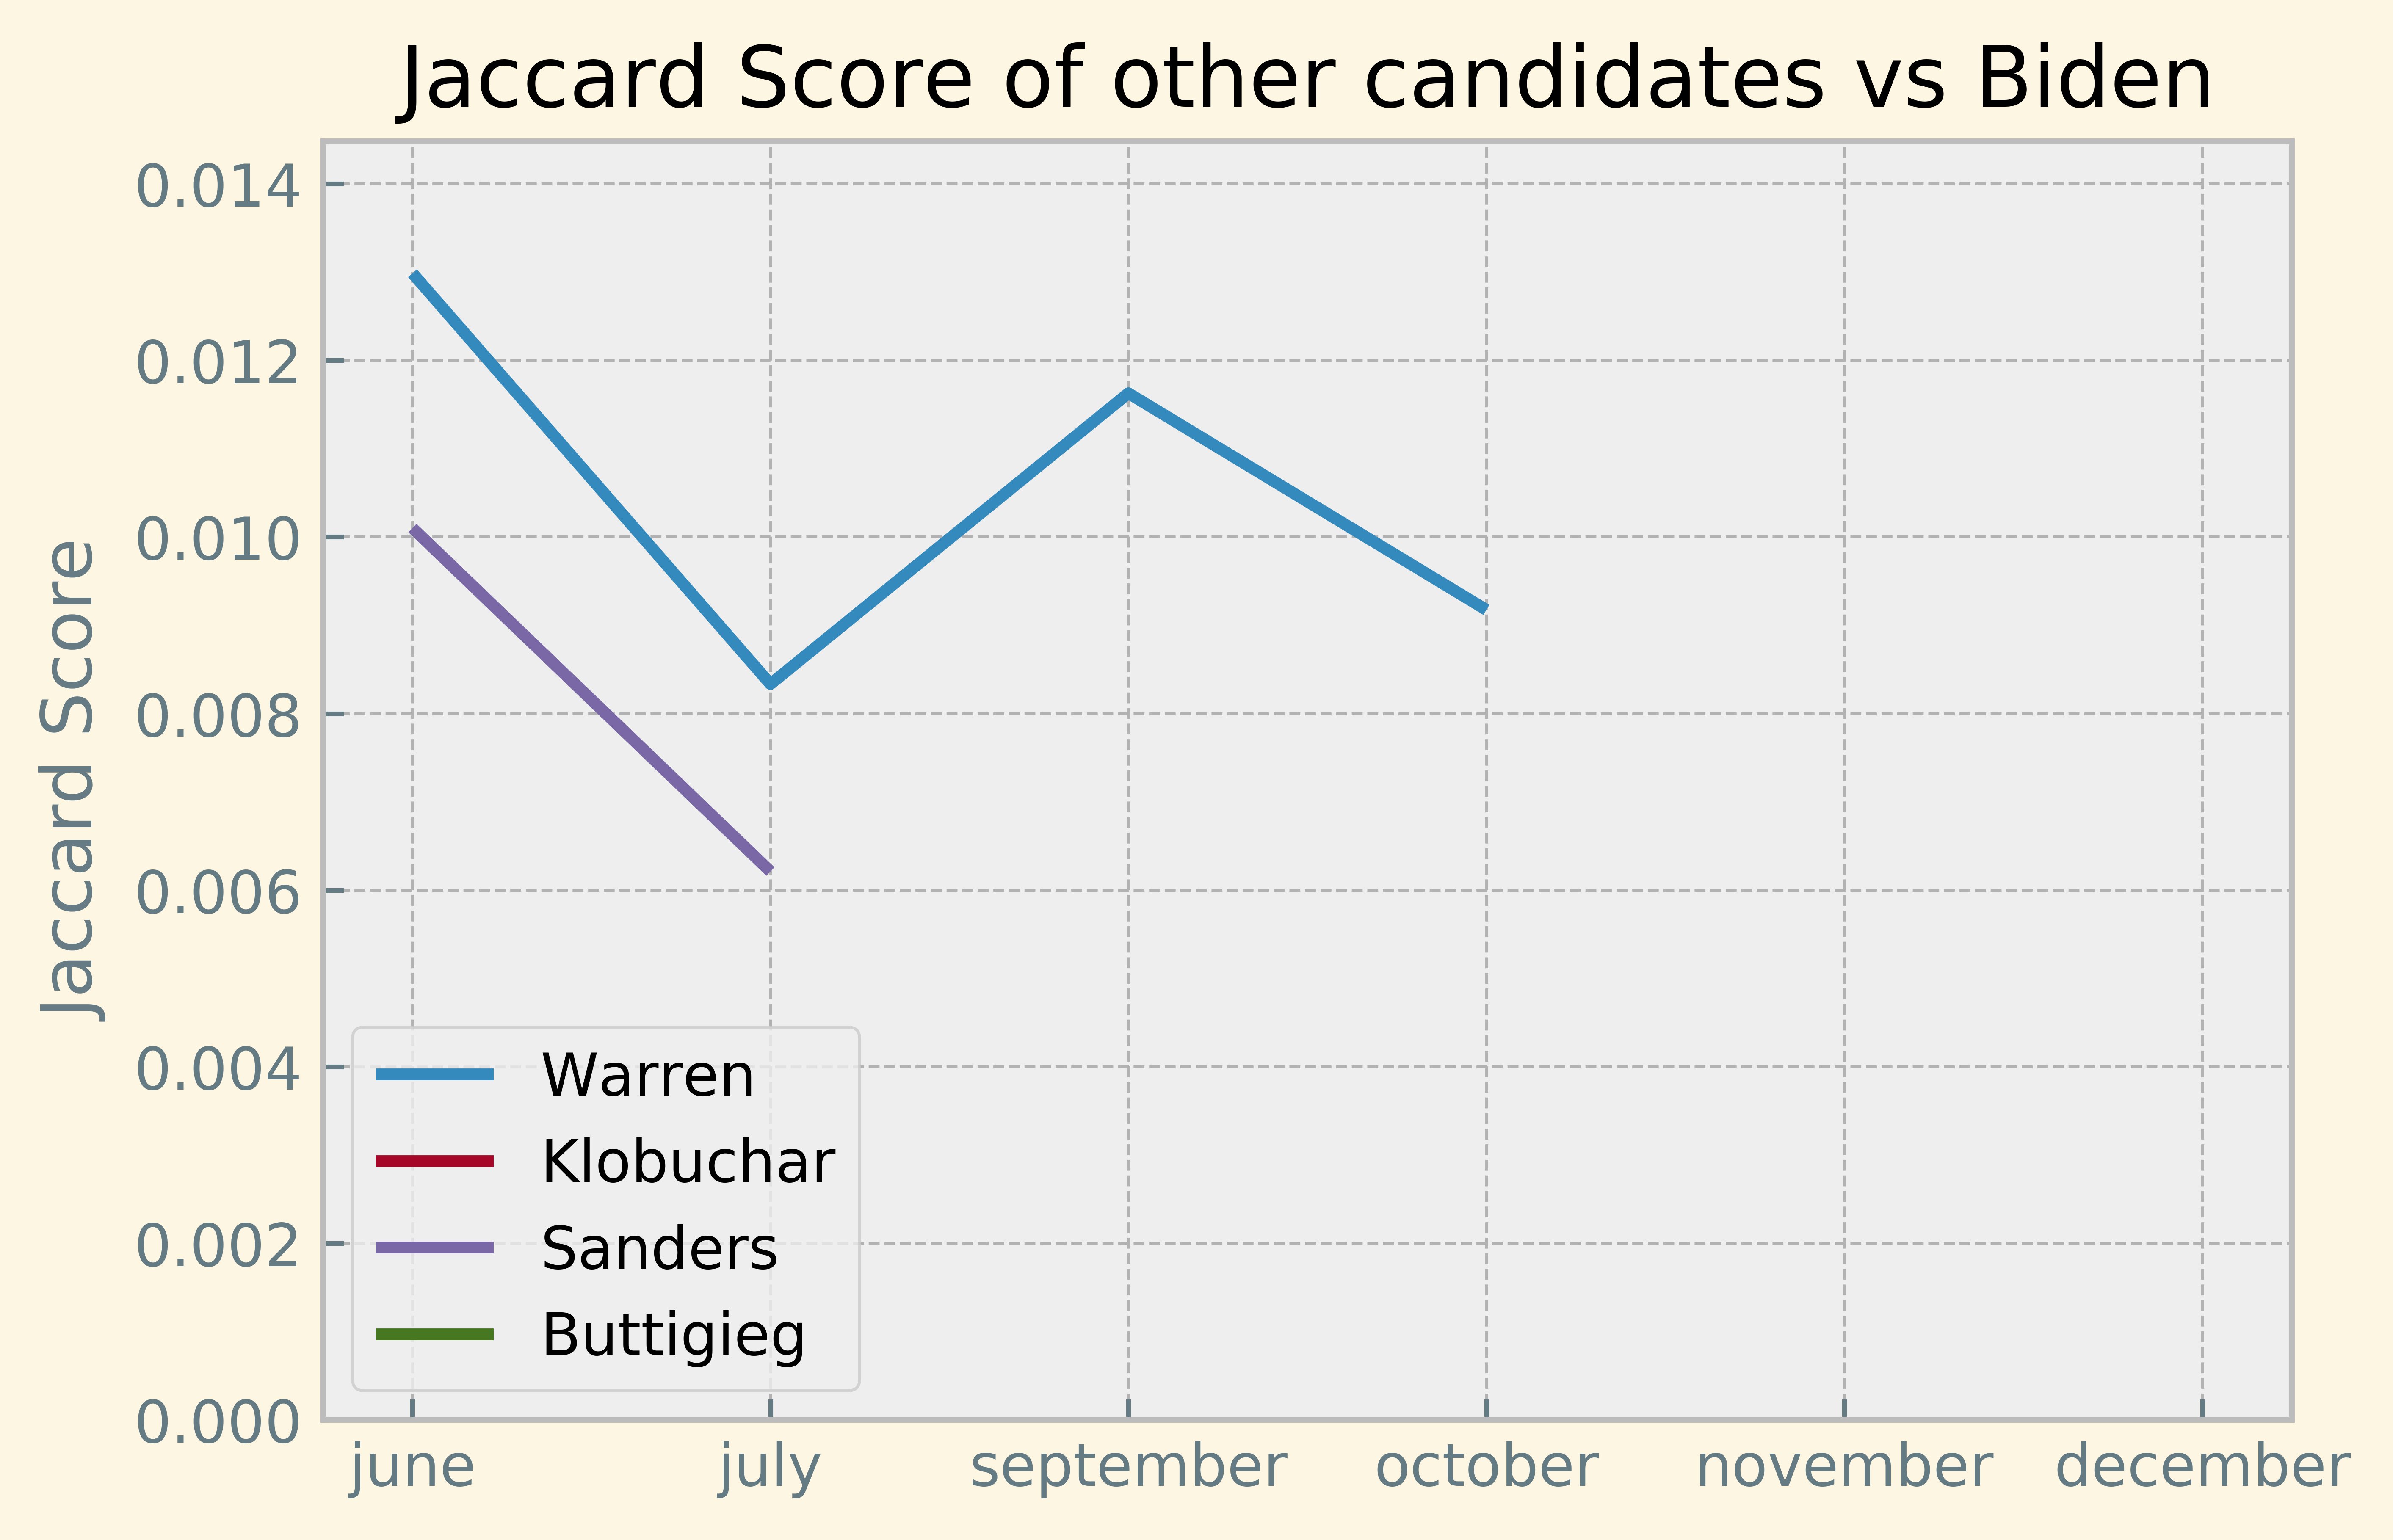

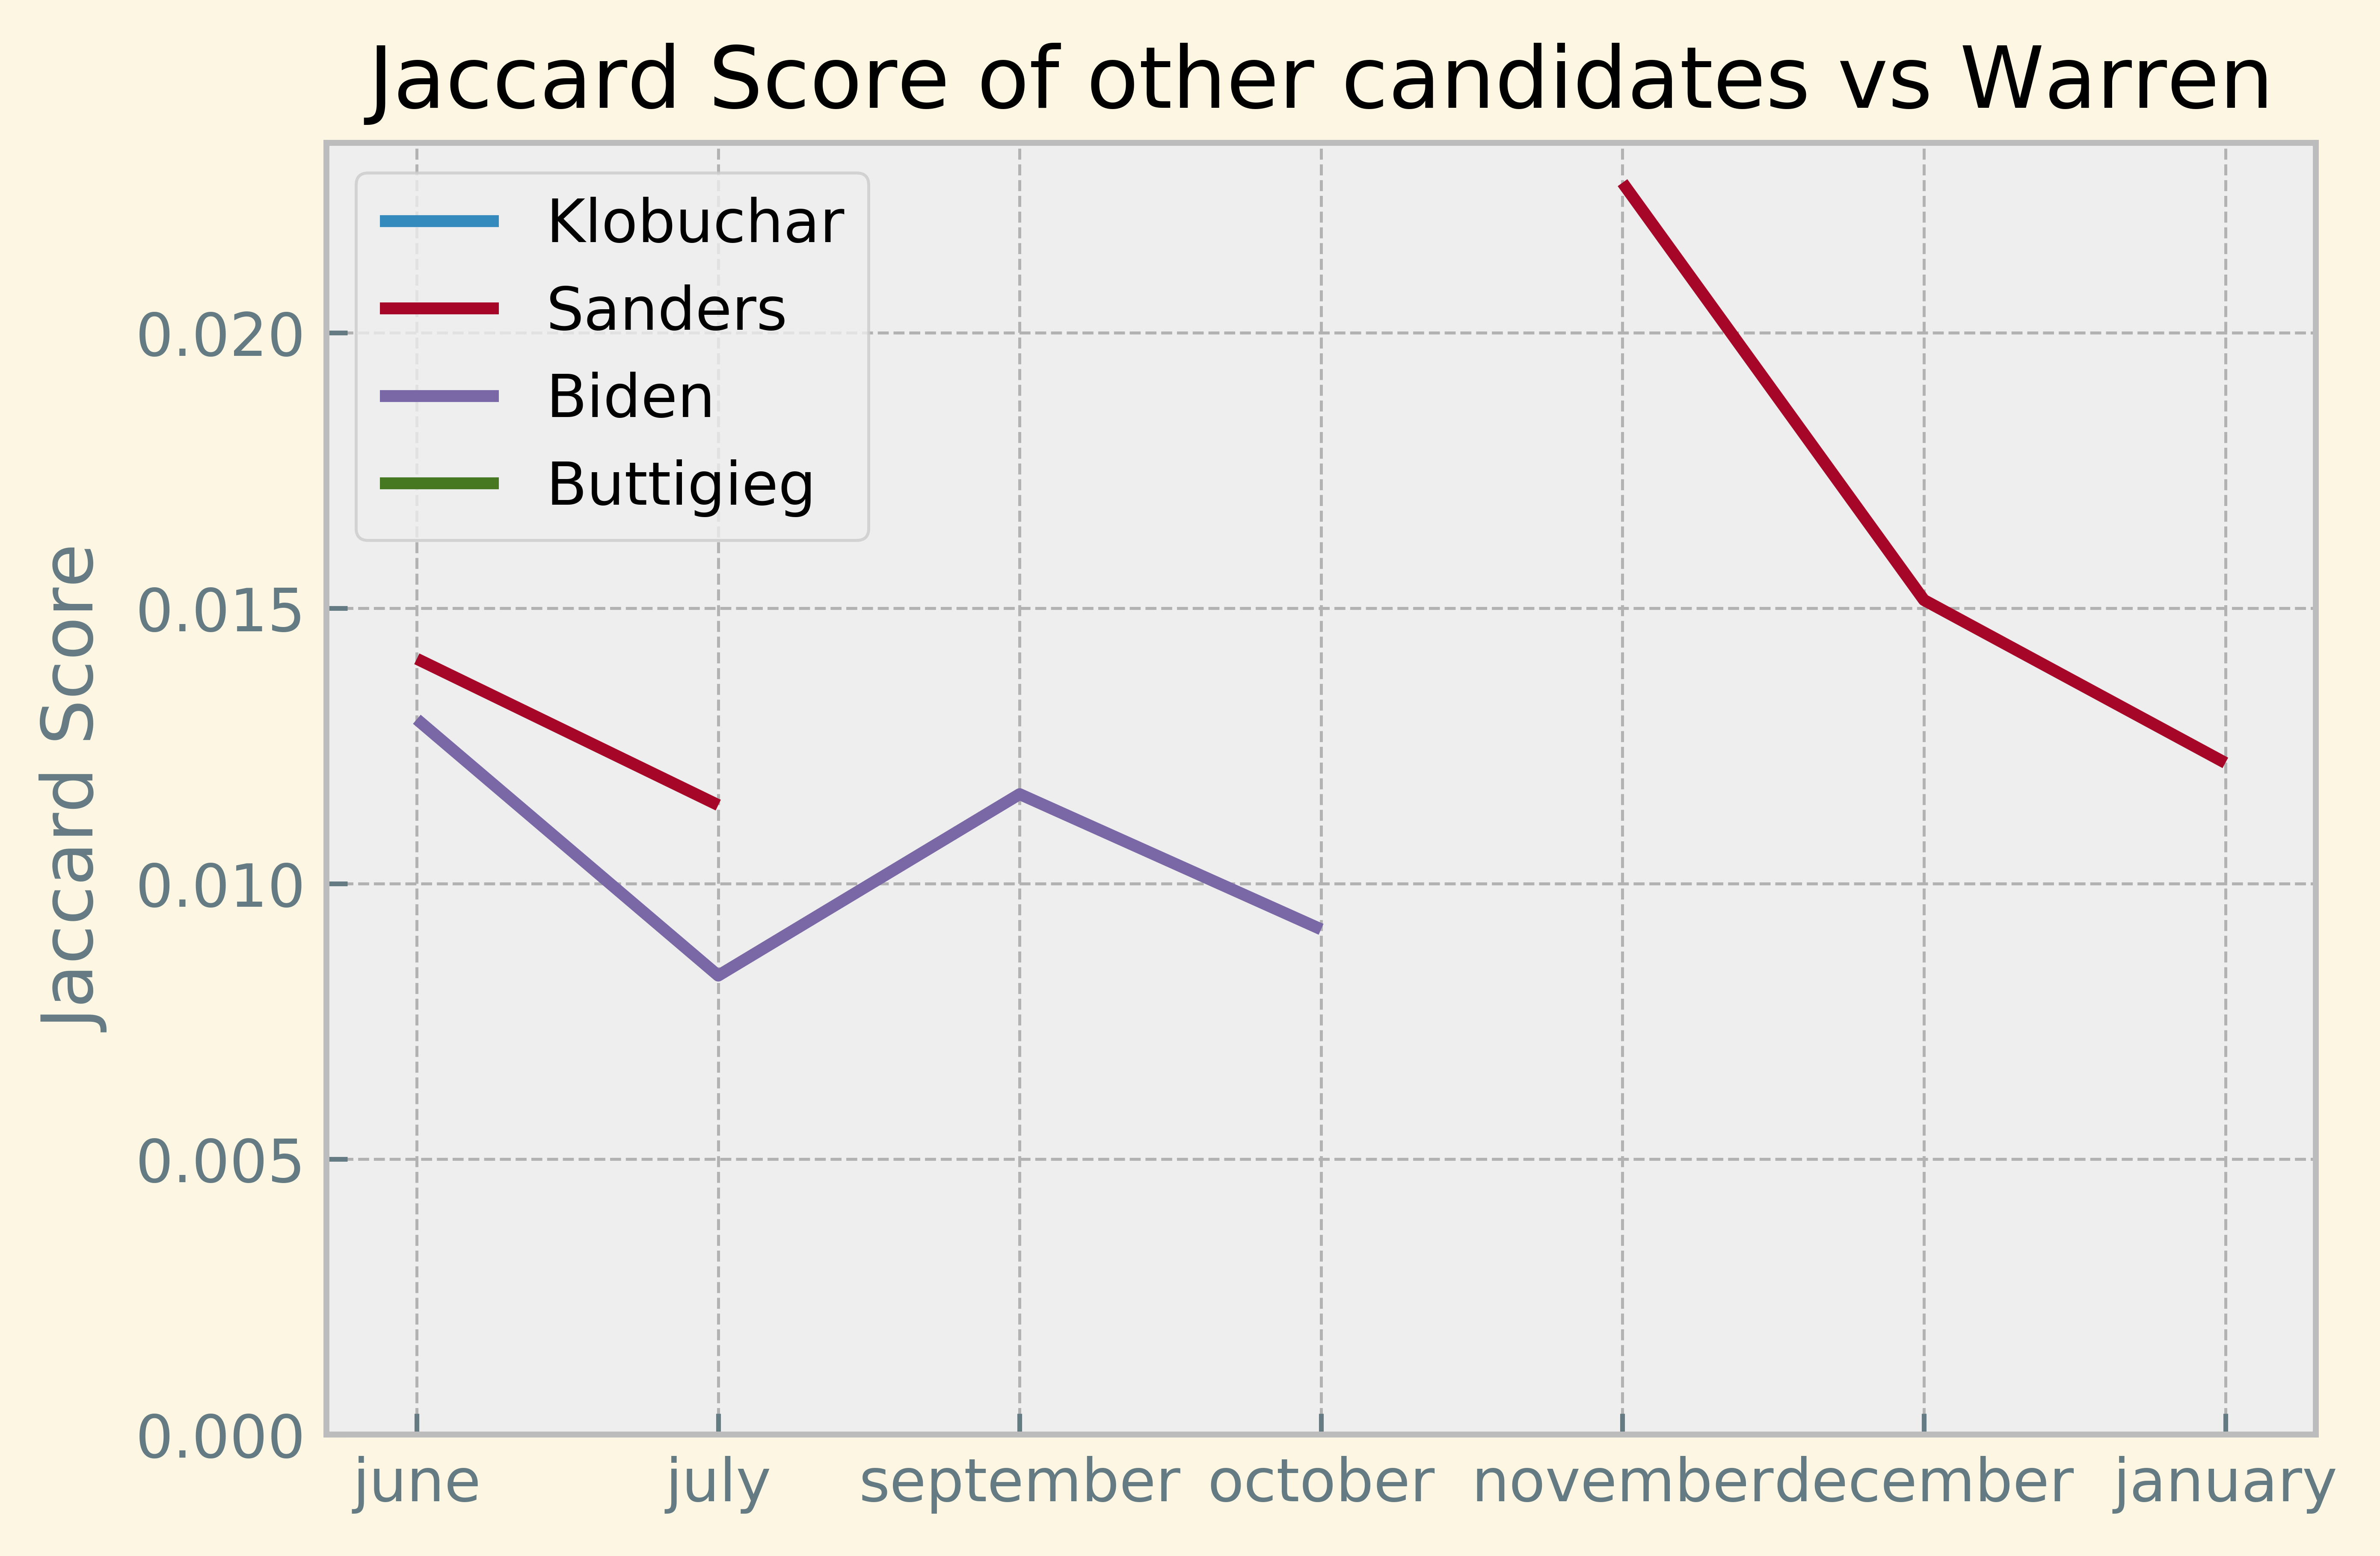

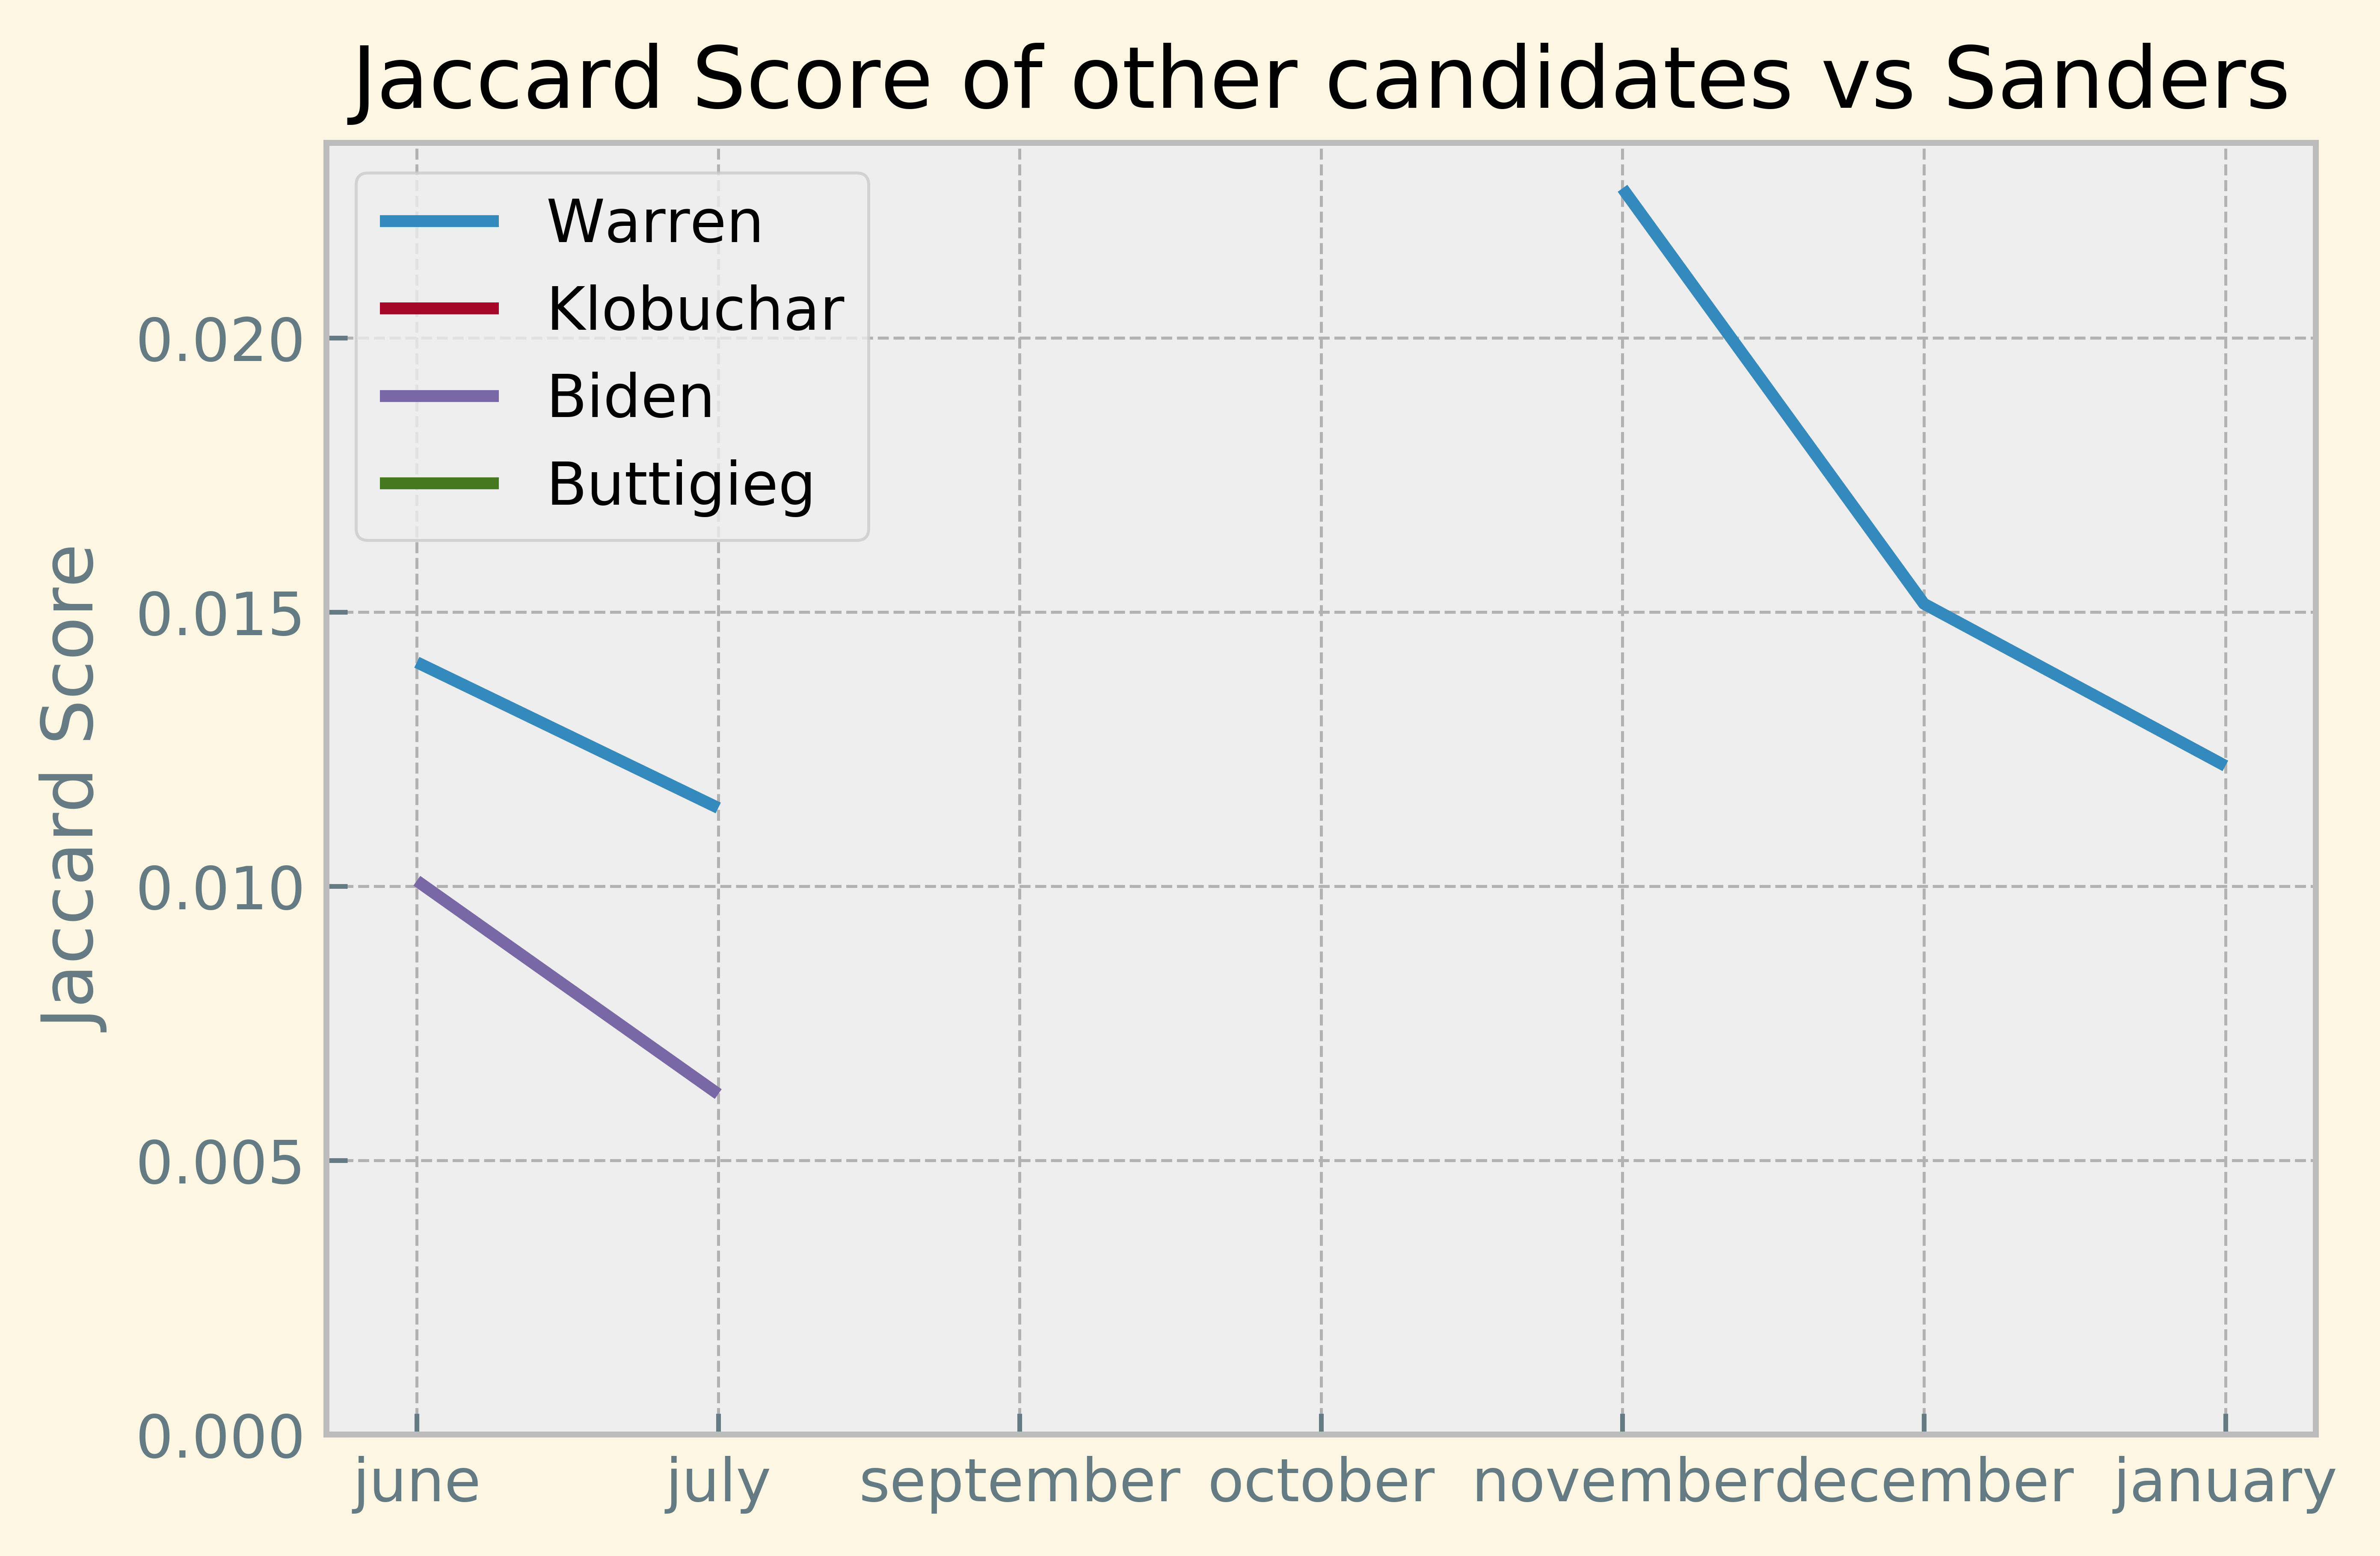

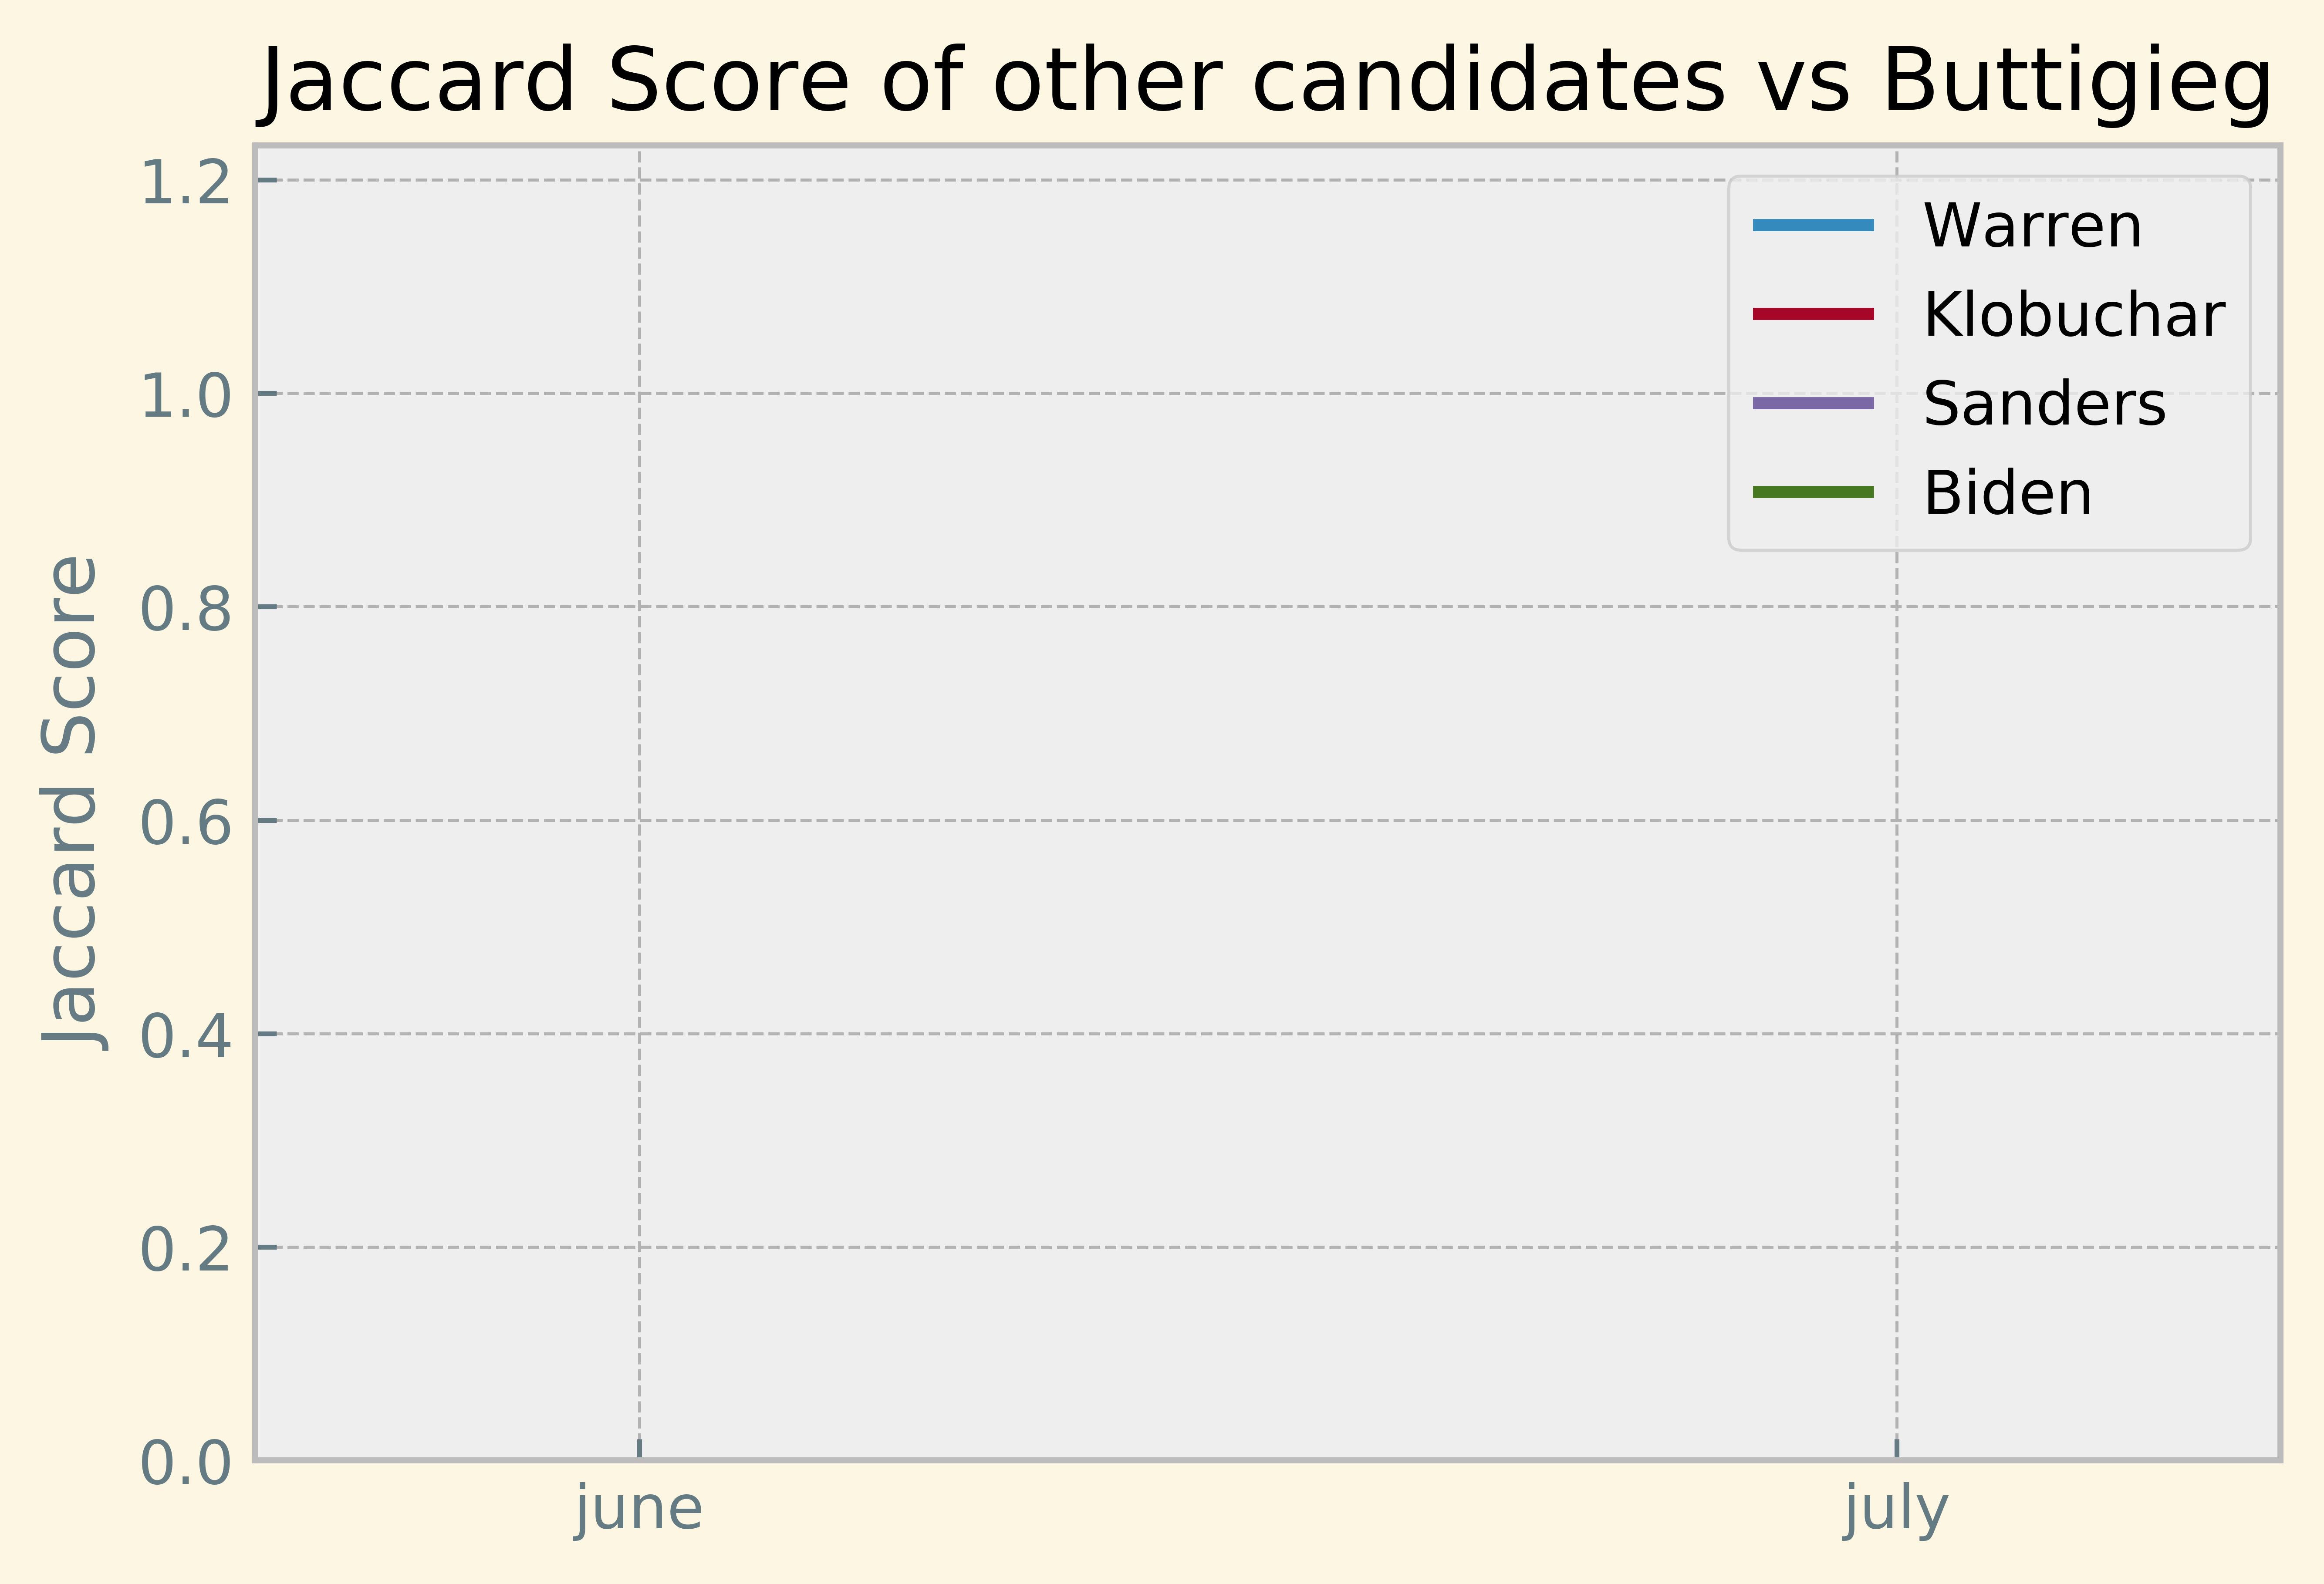

In [164]:
plt.style.use('bmh')

def plot_candidate(candidate):
    other_candidates = list(debates["name"].unique())
    other_candidates.remove(candidate)
    for i in other_candidates:
        plt.plot(jaccard_scores[candidate][i].index, jaccard_scores[candidate][i])
    
    title = "Jaccard Score of other candidates vs " + candidate 
    plt.title(title)
    plt.legend(other_candidates)
    plt.ylabel("Jaccard Score")
    plt.ylim(bottom = 0)
    plt.show()
    
plot_candidate("Biden")
plot_candidate("Warren")
plot_candidate("Sanders")
plot_candidate("Buttigieg")